# DSI 33_Project 2 - Data Cleaning - Florian Combelles
## Ames Housing Data and Kaggle Challenge

## Project Summary

Welcome to Project 2! It's time to start modeling.

**Primary Learning Objectives:**
1. Creating and iteratively refining a regression model
2. Using [Kaggle](https://www.kaggle.com/) to practice the modeling process
3. Providing business insights through reporting and presentation.

You are tasked with creating a regression model based on the Ames Housing Dataset. This model will predict the price of a house at sale.

The Ames Housing Dataset is an exceptionally detailed and robust dataset with over 70 columns of different features relating to houses.

Secondly, we are hosting a competition on Kaggle to give you the opportunity to practice the following skills:

- Refining models over time
- Use of train-test split, cross-validation, and data with unknown values for the target to simulate the modeling process
- The use of Kaggle as a place to practice data science

As always, you will be submitting a technical report and a presentation. **You may find that the best model for Kaggle is not the best model to address your data science problem.**

## Set-up

Before you begin working on this project, please do the following:

1. Sign up for an account on [Kaggle](https://www.kaggle.com/)
2. Review the material and download data files on the [DSI-US-11 Regression Challenge](https://www.kaggle.com/c/dsi-us-11-project-2-regression-challenge)
4. Review the [data description](http://jse.amstat.org/v19n3/decock/DataDocumentation.txt).

## The Modeling Process

1. The train dataset has all of the columns that you will need to generate and refine your models. The test dataset has all of those columns except for the target that you are trying to predict in your Regression model.
2. Generate your regression model using the training data. We expect that within this process, you'll be making use of:
    - train-test split
    - cross-validation / grid searching for hyperparameters
    - strong exploratory data analysis to question correlation and relationship across predictive variables
    - code that reproducibly and consistently applies feature transformation (such as the preprocessing library)
3. Predict the values for your target column in the test dataset and consider submitting your predictions to Kaggle to see how your model does against unknown data.
    - **Note**: Kaggle expects to see your submissions in a specific format. Check the challenge's page to make sure you are formatting your CSVs correctly!
    - **You are limited to models you've learned in class so far**. In other words, you cannot use XGBoost, Neural Networks or any other advanced model for this project.
4. Evaluate your models!
    - consider your evaluation metrics
    - consider your baseline score
    - how can your model be used for inference?
    - why do you believe your model will generalize to new data?

### Problem Statement:

We are part of the data team of a real estate agency based in Ames area. The objective of our company is to provide the most accurate sale price to clients who are looking to sell their houses. We also provide counseling on how to optimise sale price based on different features.


The housing and real estate market is getting more competitive and we're loosing the edge we once had to our competitors. Our current machine learning model is not accurate enough to keep up with the competition.
We need to find a better model to regain the advantage.

We came up with a new model that will allow us to regain our edge and beat our competitor. 
We will present our results to the Executives team.

In [1]:
# Importing required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, OneHotEncoder
from sklearn.metrics import r2_score, mean_squared_error

# Remove warning messages from the code
import warnings
warnings.filterwarnings('ignore')

##### Importing Ames housing

In [2]:
house_train = pd.read_csv('datasets/train.csv')

### Exploratory Data Analysis

In [3]:
# As per Subject Matter Expert recommendation, we will drop houses with more than 4000sf in order to get rid of outliers
# Looking for any entry with more than 4000sf

house_train[house_train['Gr Liv Area'] >= 4000]

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
960,1499,908154235,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,...,0,480,Gd,NaN,NaN,0,1,2008,New,160000
1885,2181,908154195,20,RL,128.0,39290,Pave,NaN,IR1,Bnk,...,0,0,NaN,NaN,Elev,17000,10,2007,New,183850


We can see that there are two entries with a Gr Live Area above 4000sf. 

We will drop them by using their indexes and resetting indexes

In [4]:
# Dropping houses with more than 4000sf and resetting indexes

house_train.drop([960,1885], inplace=True)

house_train.reset_index()

,index,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2044,2046,1587,921126030,20,RL,79.0,11449,Pave,NaN,IR1,...,0,0,NaN,NaN,NaN,0,1,2008,WD,298751
2045,2047,785,905377130,30,RL,NaN,12342,Pave,NaN,IR1,...,0,0,NaN,NaN,NaN,0,3,2009,WD,82500
2046,2048,916,909253010,50,RL,57.0,7558,Pave,NaN,Reg,...,0,0,NaN,NaN,NaN,0,3,2009,WD,177000
2047,2049,639,535179160,20,RL,80.0,10400,Pave,NaN,Reg,...,0,0,NaN,NaN,NaN,0,11,2009,WD,144000


Now that we dropped the outliers, we will preview our data

In [5]:
# Displaying first five rows of train to preview data

house_train.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [6]:
# Check datatypes and number of non-null values

house_train.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2049 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               2049 non-null   int64  
 1   PID              2049 non-null   int64  
 2   MS SubClass      2049 non-null   int64  
 3   MS Zoning        2049 non-null   object 
 4   Lot Frontage     1719 non-null   float64
 5   Lot Area         2049 non-null   int64  
 6   Street           2049 non-null   object 
 7   Alley            140 non-null    object 
 8   Lot Shape        2049 non-null   object 
 9   Land Contour     2049 non-null   object 
 10  Utilities        2049 non-null   object 
 11  Lot Config       2049 non-null   object 
 12  Land Slope       2049 non-null   object 
 13  Neighborhood     2049 non-null   object 
 14  Condition 1      2049 non-null   object 
 15  Condition 2      2049 non-null   object 
 16  Bldg Type        2049 non-null   object 
 17  House Style   

We can see that our variables are made of different types:
* Integers
* Objects
* Floats

We will have a look at the Numerical variables and transform relevant Objects to numerical values.

In [7]:
# Summarize variables

house_train.describe()

,Id,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2049.000000,2.049000e+03,2049.000000,1719.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2027.000000,...,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000,2049.000000
mean,1473.676428,7.134001e+08,57.025378,68.878999,10024.677892,6.108346,5.562714,1971.673499,1984.166423,98.797731,...,93.554417,47.224500,22.593948,2.593948,16.527574,2.165935,43.327965,6.220595,2007.775988,181479.018058
std,844.248064,1.886859e+08,42.837269,22.472112,6608.511749,1.421780,1.104897,30.171293,21.032785,172.563846,...,128.195671,65.857797,59.870165,25.241801,57.399890,36.297124,434.481342,2.742380,1.312533,79295.913255
min,1.000000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,753.000000,5.284581e+08,20.000000,58.000000,7500.000000,5.000000,5.000000,1953.000000,1964.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129800.000000
50%,1481.000000,5.354532e+08,50.000000,68.000000,9405.000000,6.000000,5.000000,1974.000000,1993.000000,0.000000,...,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,162500.000000
75%,2199.000000,9.071760e+08,70.000000,80.000000,11500.000000,7.000000,6.000000,2001.000000,2004.000000,160.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,2930.000000,9.241520e+08,190.000000,313.000000,159000.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,...,1424.000000,547.000000,432.000000,508.000000,490.000000,800.000000,12500.000000,12.000000,2010.000000,611657.000000


### Dropping Irrelevant columns in the dataset

In [8]:
# First Level of filtering on columns that wouldn't be relevant based on Expert Knowledge

house_train.drop(columns=['Id', 'PID', 'MS SubClass'], inplace=True)

We are dropping the Id, PID and MS SubClass columns as there are not relevant to our modeling.

* Id and PID are unique identifier to the houses and will not provide any relevance
* MS SubClass is very similar to House Style and we will use this one instead.

### Feature Engineering

One feature that we believe might be interesting in our model is the age of the house when it was sold. 

Since we do not have this variable in our dataset, we will have to create using other variables.

In order to do so we will take the value for 'Year Sold' and substract 'Year Built'. This should give us the age of the house when it was sold

In [9]:
# Creating a new column age for each houses

house_train['Age'] = house_train['Yr Sold'] - house_train['Year Built']

Now that we have created our new feature, we will have a look at null values and numerical variables

### Getting Rid of Null Values

In [10]:
# Count number of null values inside each columns

house_train[house_train.columns[house_train.isnull().any()]].isnull().sum()

Lot Frontage       330
Alley             1909
Mas Vnr Type        22
Mas Vnr Area        22
Bsmt Qual           55
Bsmt Cond           55
Bsmt Exposure       58
BsmtFin Type 1      55
BsmtFin SF 1         1
BsmtFin Type 2      56
BsmtFin SF 2         1
Bsmt Unf SF          1
Total Bsmt SF        1
Bsmt Full Bath       2
Bsmt Half Bath       2
Fireplace Qu      1000
Garage Type        113
Garage Yr Blt      114
Garage Finish      114
Garage Cars          1
Garage Area          1
Garage Qual        114
Garage Cond        114
Pool QC           2041
Fence             1649
Misc Feature      1985
dtype: int64

Most of the null values appears in numerical variables. The reason for having null values is the absence of feature from the house (a null Lot Frontage means that their is no feet of street connected to the house, therefore the should be 0)

We will start getting rid of null values for all our ordinal variables and numerical values

### Transforming Ordinal variables into numerical

Our first step is to transform ordinal variables into numerical values in order for our Machine Learning Model to use them.

In [11]:
# Getting the value names for Quality and Condition in order to create a numeric dictionary

house_train['Exter Qual'].value_counts()

TA    1247
Gd     697
Ex      79
Fa      26
Name: Exter Qual, dtype: int64

Now that we know which values are used to rank variables in the Quality and Condition variables, we can create a dictionary and assign them a numeric value.

In [12]:
# Creating Numerical Ranking System for Ordinal Quality and Condition columns

# Creating a dictionary matching values:
# Had to add a np.nan match for Pool QC as it was not detected using NA
qualcond_rank = {np.nan: 0, 'NA': 0,'Po': 1,'Fa': 2,'TA': 3,'Gd': 4,'Ex': 5}

# Creating a list of columns to rename
qualcond_col = ['Exter Qual', 'Exter Cond','Bsmt Qual', 'Bsmt Cond', 'Heating QC',
      'Kitchen Qual', 'Fireplace Qu', 'Garage Qual', 'Garage Cond', 'Pool QC']

# Create a loop that will go through all the columns and replace the value based on the dictionary
for i in qualcond_col:
    house_train[i].replace(qualcond_rank, inplace=True)
#print(house[qualcond_col])

In [13]:
# Making sure the types changed for all columns with replaced values

house_train[qualcond_col].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2049 entries, 0 to 2050
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Exter Qual    2049 non-null   int64
 1   Exter Cond    2049 non-null   int64
 2   Bsmt Qual     2049 non-null   int64
 3   Bsmt Cond     2049 non-null   int64
 4   Heating QC    2049 non-null   int64
 5   Kitchen Qual  2049 non-null   int64
 6   Fireplace Qu  2049 non-null   int64
 7   Garage Qual   2049 non-null   int64
 8   Garage Cond   2049 non-null   int64
 9   Pool QC       2049 non-null   int64
dtypes: int64(10)
memory usage: 176.1 KB


The type has chaged from object to integer.

We can now use these in our machine learning model

In [14]:
# Getting the value names for Alley in order to create a numeric dictionary

house_train['Alley'].value_counts()

Grvl    85
Pave    55
Name: Alley, dtype: int64

According to our data dictionary, since Street and Alley uses the same ordinal values, we will change the values for both columns in order to save time and efforts.

In [15]:
# Creating Numerical Ranking System for other columns

stal_rank = {'Grvl': 2, 'Pave': 1, 'NA': 0, np.nan: 0}
stal_col = ['Street', 'Alley']

for i in stal_col:
    house_train[i].replace(stal_rank, inplace=True)
#print(house[stal_col])

In [16]:
# Getting the value names for Lot Shape in order to create a numeric dictionary

house_train['Lot Shape'].value_counts()

Reg    1295
IR1     691
IR2      55
IR3       8
Name: Lot Shape, dtype: int64

In [17]:
# Creating Numerical Ranking System for other columns

lotshp_rank = {'Reg': 4, 'IR1': 3, 'IR2': 2, 'IR3': 1}

house_train.replace({'Lot Shape': lotshp_rank}, inplace=True)
#print(house['Lot Shape'])

In [18]:
# Getting the value names for Land Contour in order to create a numeric dictionary

house_train['Land Contour'].value_counts()

Lvl    1843
HLS      85
Bnk      78
Low      43
Name: Land Contour, dtype: int64

In [19]:
# Creating Numerical Ranking System for other columns

ldcont_rank = {'Lvl': 4, 'Bnk': 3, 'HLS': 2, 'Low': 1}

house_train.replace({'Land Contour': ldcont_rank}, inplace=True)
#print(house['Land Contour'])

In [20]:
# Getting the value names for Land Contour in order to create a numeric dictionary

house_train['Land Slope'].value_counts()

Gtl    1951
Mod      88
Sev      10
Name: Land Slope, dtype: int64

In [21]:
# Creating Numerical Ranking System for other columns

ldslope_rank = {'Gtl': 3, 'Mod': 2, 'Sev': 1}

house_train.replace({'Land Slope': ldslope_rank}, inplace=True)
#print(house['Land Slope'])

In [22]:
# Getting the value names for Basement Exposure in order to create a numeric dictionary

house_train['Bsmt Exposure'].value_counts()

No    1339
Av     288
Gd     201
Mn     163
Name: Bsmt Exposure, dtype: int64

In [23]:
# Creating Numerical Ranking System for other columns

bsmexp_rank = {'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1, 'NA': 0, np.nan: 0}

house_train.replace({'Bsmt Exposure': bsmexp_rank}, inplace=True)
#print(house['Bsmt Exposure'])

In [24]:
# Getting the value names for BsmtFin Type 1 in order to create a numeric dictionary

house_train['BsmtFin Type 1'].value_counts()

GLQ    613
Unf    603
ALQ    293
BLQ    200
Rec    183
LwQ    102
Name: BsmtFin Type 1, dtype: int64

According to our data dictionary, since Street and Alley uses the same ordinal values, we will change the values for both columns in order to save time and efforts.

In [25]:
# Creating Numerical Ranking System for other columns

bsfin_rank = {'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3,
              'LwQ': 2, 'Unf': 1, 'NA': 0, np.nan: 0}
bsfin_col = ['BsmtFin Type 1', 'BsmtFin Type 2']

for i in bsfin_col:
    house_train[i].replace(bsfin_rank, inplace=True)
#print(house['BsmtFin Type 1'])

In [26]:
# Getting the value names for Central Air in order to create a numeric dictionary

house_train['Central Air'].value_counts()

Y    1908
N     141
Name: Central Air, dtype: int64

In [27]:
# Creating Numerical Ranking System for other columns

ac_rank = {'N': 0, 'Y': 1}

house_train.replace({'Central Air': ac_rank}, inplace=True)
#print(house['Central Air'])

In [28]:
# Getting the value names for Garage Finish in order to create a numeric dictionary

house_train['Garage Finish'].value_counts()

Unf    849
RFn    579
Fin    507
Name: Garage Finish, dtype: int64

In [29]:
# Creating Numerical Ranking System for other columns

grg_rank = {'Fin': 3, 'RFn': 2, 'Unf': 1, 'NA': 0, np.nan: 0}

house_train.replace({'Garage Finish': grg_rank}, inplace=True)
#print(house['Garage Finish'])

In [30]:
# Getting the value names for Functionality in order to create a numeric dictionary

house_train['Functional'].value_counts()

Typ     1913
Min2      42
Min1      42
Mod       29
Maj1      12
Maj2       7
Sev        2
Sal        2
Name: Functional, dtype: int64

In [31]:
# Creating Numerical Ranking System for other columns

func_rank = {'Typ': 7, 'Min1': 6, 'Min2': 5, 'Mod': 4,
             'Maj1': 3, 'Maj2': 2, 'Sev': 1, 'Sal': 0}

house_train.replace({'Functional': func_rank}, inplace=True)
#print(house['Functional'])

In [32]:
# Getting the value names for Paved Drive in order to create a numeric dictionary

house_train['Paved Drive'].value_counts()

Y    1859
N     151
P      39
Name: Paved Drive, dtype: int64

In [33]:
# Creating Numerical Ranking System for other columns

pavdrv_rank = {'Y': 3, 'P': 2, 'N': 1}

house_train.replace({'Paved Drive': pavdrv_rank}, inplace=True)
#print(house['Paved Drive'])

In [34]:
# Getting the value names for Fence in order to create a numeric dictionary

house_train['Fence'].value_counts()

MnPrv    227
GdPrv     83
GdWo      80
MnWw      10
Name: Fence, dtype: int64

In [35]:
# Creating Numerical Ranking System for other columns

fnc_rank = {'GdPrv': 4, 'MnPrv': 3, 'GdWo': 2, 'MnWw': 1, 'NA': 0, np.nan: 0}

house_train.replace({'Fence': fnc_rank}, inplace=True)
#print(house['Fence'])

### Getting rid of null values - Part 2

Now that we transformed ordinal variables, let's have a look again at our missing values.

In [36]:
# Count number of null values inside each columns

house_train[house_train.columns[house_train.isnull().any()]].isnull().sum()

Lot Frontage       330
Mas Vnr Type        22
Mas Vnr Area        22
BsmtFin SF 1         1
BsmtFin SF 2         1
Bsmt Unf SF          1
Total Bsmt SF        1
Bsmt Full Bath       2
Bsmt Half Bath       2
Garage Type        113
Garage Yr Blt      114
Garage Cars          1
Garage Area          1
Misc Feature      1985
dtype: int64

Among the columns, 3 of them are categorical (Mas Vnr Type, Garage Type and Misc Feature). For these three columns we will replace the null valeus with 'None'

In [37]:
# Fill non numerical Null values with 'None'

house_train['Mas Vnr Type'].fillna('None', inplace=True)
house_train['Garage Type'].fillna('None', inplace=True)
house_train['Misc Feature'].fillna('None', inplace=True)

For all the numerical columns, we will replace the null values with 0.

In [38]:
# Fill other Null values in numerical variables with 0

house_train.fillna(0, inplace=True)

Our Dataset is now void of null values.

We can now check the correlation or our numerical variables with SalePrice

### Selecting the numerical values based on their correlation with SalePrice

##### Features correlation with target

In order to select the best numerical variables for our model, we will be looking at their correlation with our target (SalePrice).

We only want to keep features that have a very strong positive or negative correlation with SalePrice. Ideally, we would like to keep only variables with a correlation above 0.7. 

In [39]:
# Correlation for SalePrice above 0.6

saleprice_corr = abs(house_train.corr()['SalePrice']).sort_values()
saleprice_corr[saleprice_corr >0.6]

Bsmt Qual        0.613236
Garage Cars      0.648227
1st Flr SF       0.648252
Garage Area      0.655097
Total Bsmt SF    0.665116
Kitchen Qual     0.694295
Exter Qual       0.715048
Gr Liv Area      0.719463
Overall Qual     0.803462
SalePrice        1.000000
Name: SalePrice, dtype: float64

We first defined a treshold of 0.7 to select our numerical features, however only 3 of the varaibles met this treshold. In order to include more variables for our model we lowered it to 0.6 instead.

This gave us a list of 9 variables that we will use for our modeling.

##### Heatmap and Collinearity

Now that we selected our numerical features, we want to make sure that they are heavily collinear between one another. 

In order to to do this, we will create a new dataframe and plot a heatmap of the correlation matrix.

In [40]:
# Creating a DataFrame that will include our high correlated features

high_corr = house_train[['Bsmt Qual', 'Garage Cars', '1st Flr SF', 'Garage Area', 'Total Bsmt SF', 'Kitchen Qual',
                       'Exter Qual', 'Gr Liv Area', 'Overall Qual', 'SalePrice']]

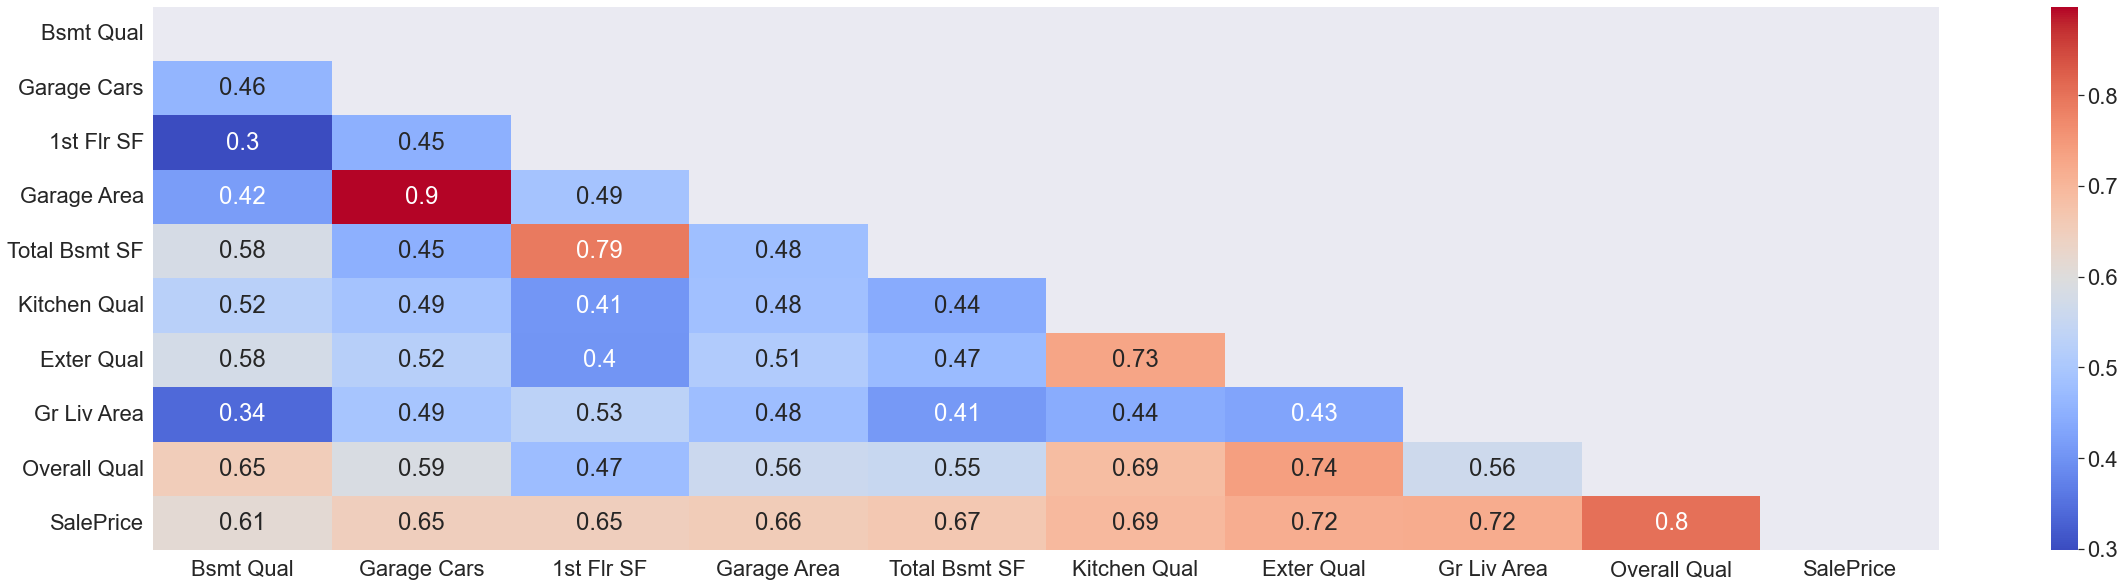

In [41]:
# Creating a heatmap of our new clean dataframe

# Create a mask to only display the lower half
mask = np.triu(np.ones_like(high_corr.corr(), dtype=bool))

sns.set(font_scale=2)

plt.figure(figsize=(40,10))
heatmap = sns.heatmap(high_corr.corr(), mask = mask, annot=True, cmap='coolwarm')
#heatmap.ax_heatmap.set_xticklabels(heatmap.ax_heatmap.get_xmajorticklabels(), fontsize = 30)

plt.savefig('figs/corr_matrix_full.png')
plt.show()

From the Correlation Matrix, we can see that some variables have a high co-correlation
* Exter Qual and Kitchen Qual have a correlation of 0.73
* Exter Qual and Overral Qual have a correlation of 0.74
* Exter Qual and Kitchen Qual have a corraltion of 0.74
* Garage Cars and Garage Area have a correlation of 0.9
* Total Bsmt SF and 1st Flr SF have a correlation of 0.79

As such, we will be dropping the following variables in order to avoid any type of overfitting on our model.
* Kitchen Qual
* Exter Qual
* Garage Cars
* Total Bsmt SF

Now that we have succesfully transformed all of our ordinal variables in numeric variables and chosen our numerical variables, we can have a look at our Categorical variables

### Looking at Categorical variables

Moving on to the Categorical variables, we will plot both a boxplot and a barchart in order to identify and remove variables that are not diverse enough and those who are majoritarely leaning towards one value

In [42]:
# Creating a new dataframe for all object variables

house_train_cat = house_train.select_dtypes(include = 'object').copy()
house_train_cat.head(2)

,MS Zoning,Utilities,Lot Config,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Foundation,Heating,Electrical,Garage Type,Misc Feature,Sale Type
0,RL,AllPub,CulDSac,Sawyer,RRAe,Norm,1Fam,2Story,Gable,CompShg,HdBoard,Plywood,BrkFace,CBlock,GasA,SBrkr,Attchd,None,WD
1,RL,AllPub,CulDSac,SawyerW,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,PConc,GasA,SBrkr,Attchd,None,WD


We start by creating a new dataframe that contain all our categorical variables.

We will use this dataframe to plot our boxplots and barcharts

In [43]:
# Creating Boxplots and Barchart for all Categorical variables in order to select which one to keep 
# Adding SalePrice into the categorical dataframe

house_train_cat['SalePrice'] = house_train['SalePrice']

Since we want to plot our categorical variables agaisnt the SalePrice, we add SalePrice into the new categorical dataframe.

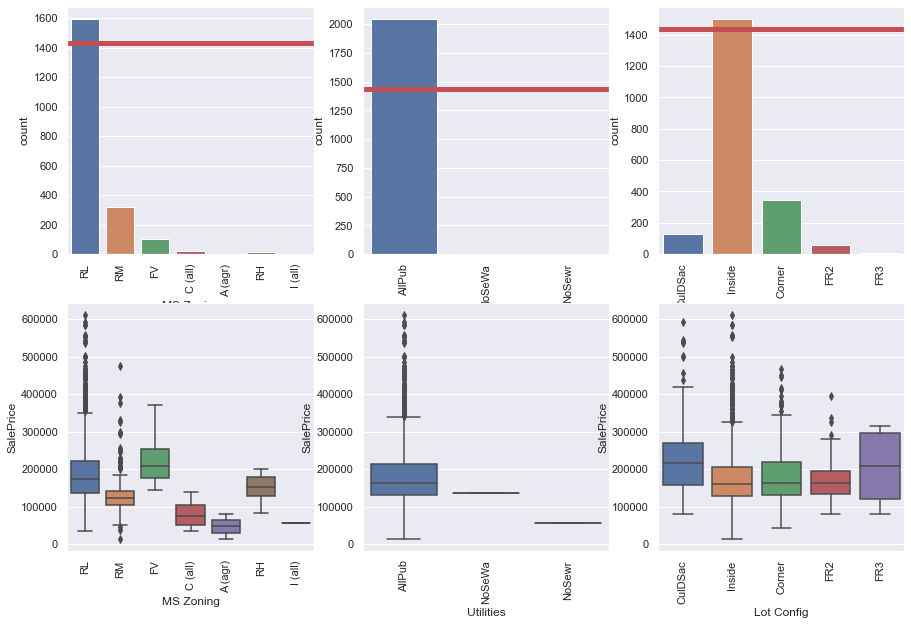

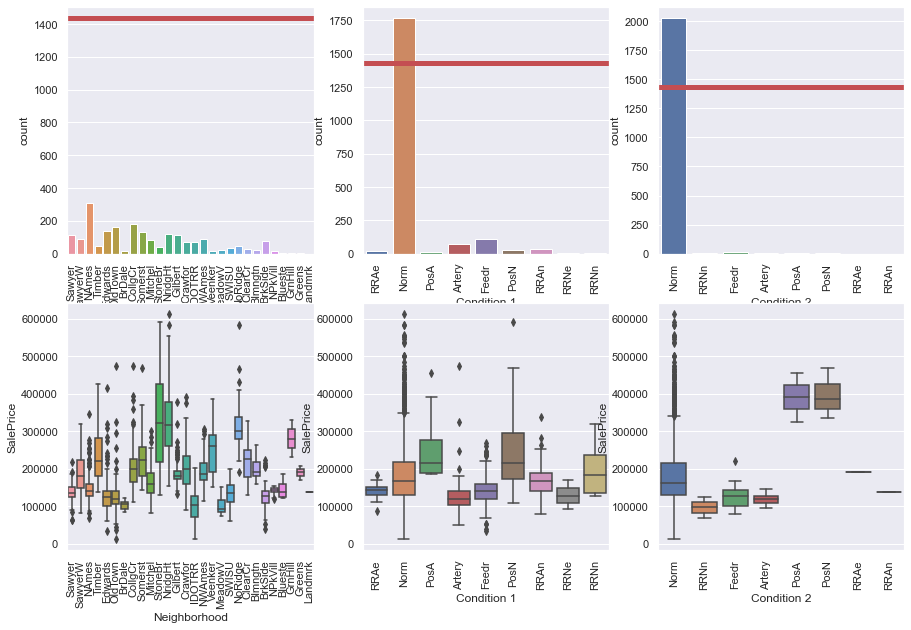

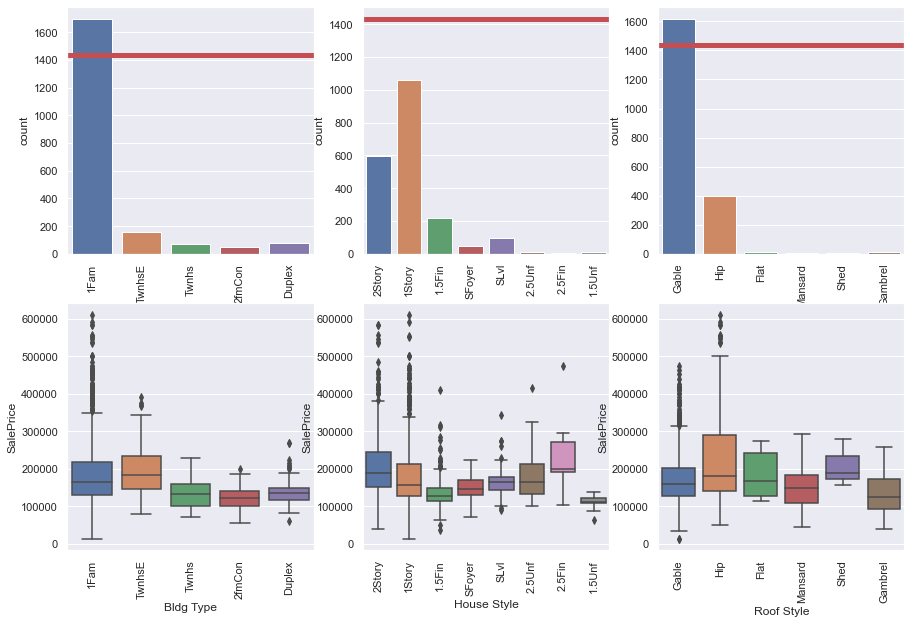

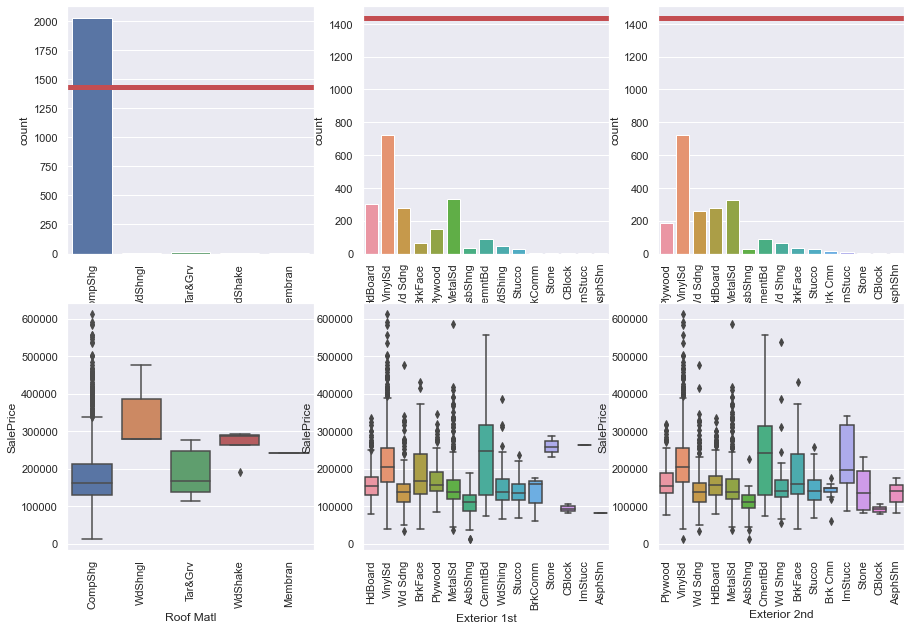

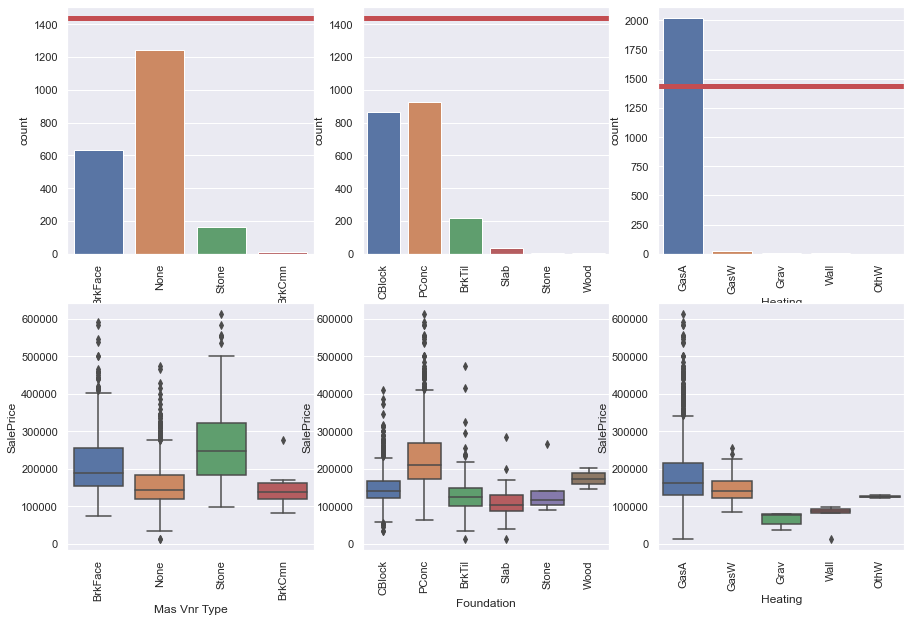

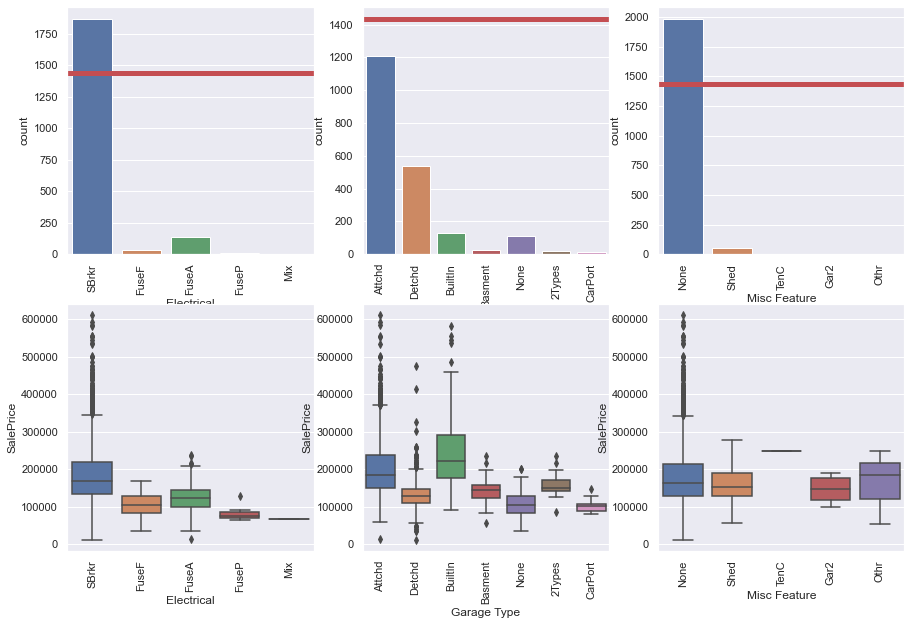

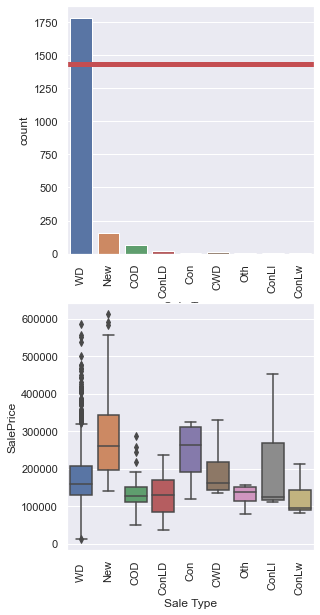

In [44]:
#Creating a serie of subplots (Boxplot and Barchart) for each categorical variable inside the dataset

sns.set(font_scale=1)

ix = 1
fig = plt.figure(figsize = (15,10))
for c in list(house_train_cat.columns):
    if ix <= 3:
        if c != 'SalePrice':
            ax1 = fig.add_subplot(2,3,ix)
            sns.countplot(data = house_train_cat, x=c, ax = ax1)
            ax1.axhline(len(house_train_cat)* 0.70, color= 'r', label='Treshold', linewidth= 5)
            ax1.tick_params(axis='x', rotation=90)
            ax2 = fig.add_subplot(2,3,ix+3)
            sns.boxplot(data=house_train_cat, x=c, y='SalePrice', ax=ax2)
            ax2.tick_params(axis='x', rotation=90)
    ix = ix +1
    if ix == 4: 
        fig = plt.figure(figsize = (15,10))
        ix =1

##### Observations on the barcharts and boxplots of categorical values

Based on the boxplot and barchart visualizations, we can see that a significant number of barcharts have 1 value that is overrepresented.
We have defined a treshold at 0.7 in order to identify them. 

Using these variables as part of our features will lead the Machine Learning Model to overfit. As such, we do not want to use these and will drop them.

Variables to drop:
* MS Zoning
* Utilities
* Condition 1 
* Condition 2
* Building Type
* Roof Type
* Roof Material
* Basement Fin Type 2
* Heating
* Electrical
* Misc Feature
* Sale Type

Based on the Boxplot, we can see that Lot Config is pretty 'flat', meaning that the values are quite similar to each other.
As such, we will also drop it
Variables to drop:
* Lot Config


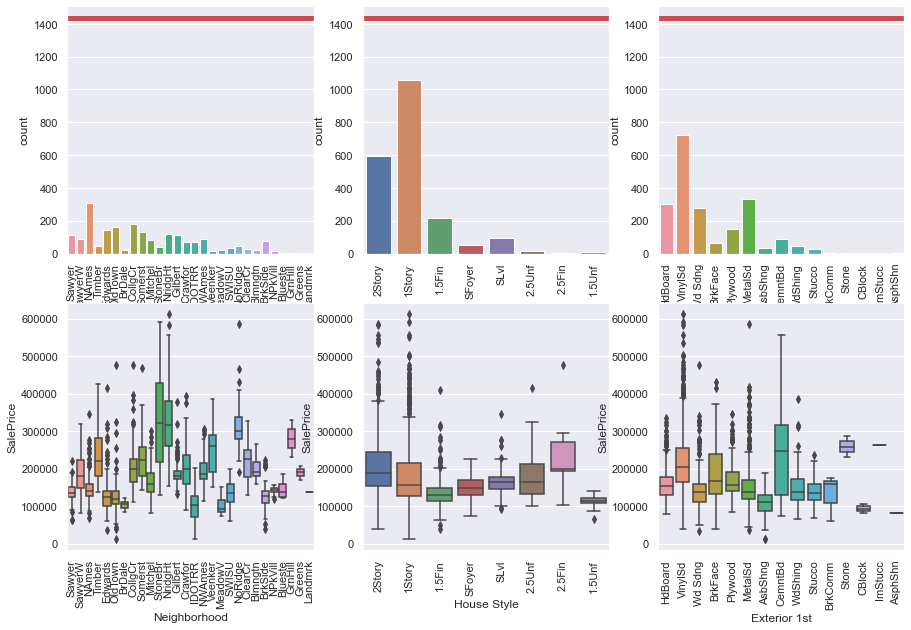

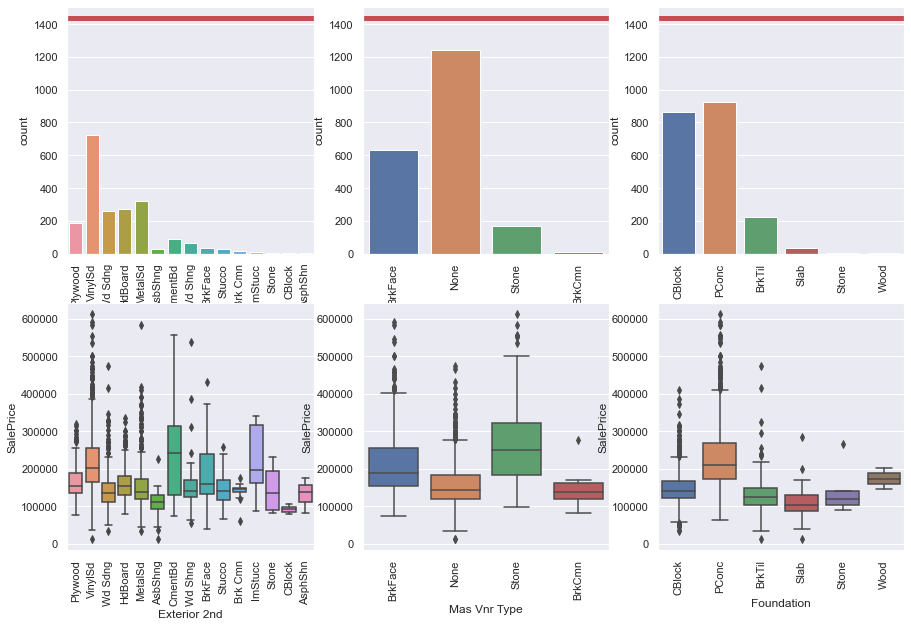

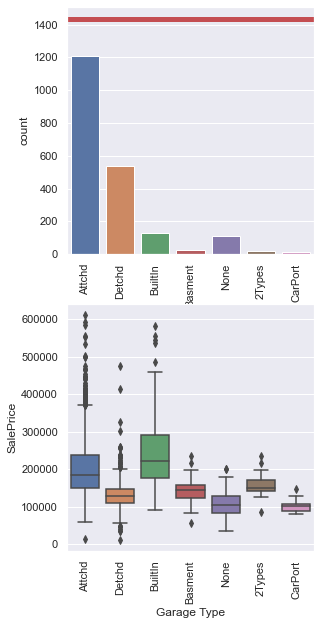

In [45]:
# Creating subplots only for the variables we have selected.

cat_selec= ['Neighborhood', 'House Style', 'Exterior 1st',
            'Exterior 2nd', 'Mas Vnr Type', 'Foundation', 'Garage Type']


ix = 1
fig = plt.figure(figsize = (15,10))
for c in list(cat_selec):
    if ix <= 3:
        if c != 'SalePrice':
            ax1 = fig.add_subplot(2,3,ix)
            sns.countplot(data = house_train_cat, x=c, ax = ax1)
            ax1.axhline(len(house_train_cat)* 0.7, color= 'r', label='Treshold', linewidth= 5)
            ax1.tick_params(axis='x', rotation=90)
            ax2 = fig.add_subplot(2,3,ix+3)
            sns.boxplot(data=house_train_cat, x=c, y='SalePrice', ax=ax2)
            ax2.tick_params(axis='x', rotation=90)
    ix = ix +1
    if ix == 4: 
        fig = plt.figure(figsize = (15,10))
        ix =1

After selecting our categorical variables, we will drop the rest from our DataFrame as they will not be used in our model

In [46]:
# Dropping categorical variables we will not be using

house_train.drop(columns=['MS Zoning', 'Utilities', 'Condition 1', 'Condition 2', 'Bldg Type', 'Roof Style',
                                             'Roof Matl', 'BsmtFin Type 2', 'Heating', 'Electrical', 'Misc Feature', 'Sale Type',
                                             'Lot Config'], inplace=True)

### Creating a new DataFrame containing our selected Numerical and Categorical variables

In [47]:
# Creating a new DF house_clean with all the numerical columns with a correlation above 0.6 with SalePrice
# Along with categorical variables that showed some potential.


house_train_clean = house_train[['Bsmt Qual', '1st Flr SF', 'Garage Area', 'Gr Liv Area', 'Overall Qual',
                                 'Neighborhood', 'House Style', 'Exterior 1st',
                                 'Mas Vnr Type', 'Foundation', 'Garage Type','Age', 'SalePrice']]

In [48]:
# Making sure we only have the required number of columns

house_train_clean.columns

Index(['Bsmt Qual', '1st Flr SF', 'Garage Area', 'Gr Liv Area', 'Overall Qual',
       'Neighborhood', 'House Style', 'Exterior 1st', 'Mas Vnr Type',
       'Foundation', 'Garage Type', 'Age', 'SalePrice'],
      dtype='object')

In [49]:
# Checking for null values in the cleaned DF

house_train_clean[house_train_clean.columns[house_train_clean.isnull().any()]].isnull().sum()

Series([], dtype: float64)

Great! There is no null values in our clean dataframe

array([[<AxesSubplot:title={'center':'Bsmt Qual'}>,
        <AxesSubplot:title={'center':'1st Flr SF'}>,
        <AxesSubplot:title={'center':'Garage Area'}>],
       [<AxesSubplot:title={'center':'Gr Liv Area'}>,
        <AxesSubplot:title={'center':'Overall Qual'}>,
        <AxesSubplot:title={'center':'Age'}>],
       [<AxesSubplot:title={'center':'SalePrice'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

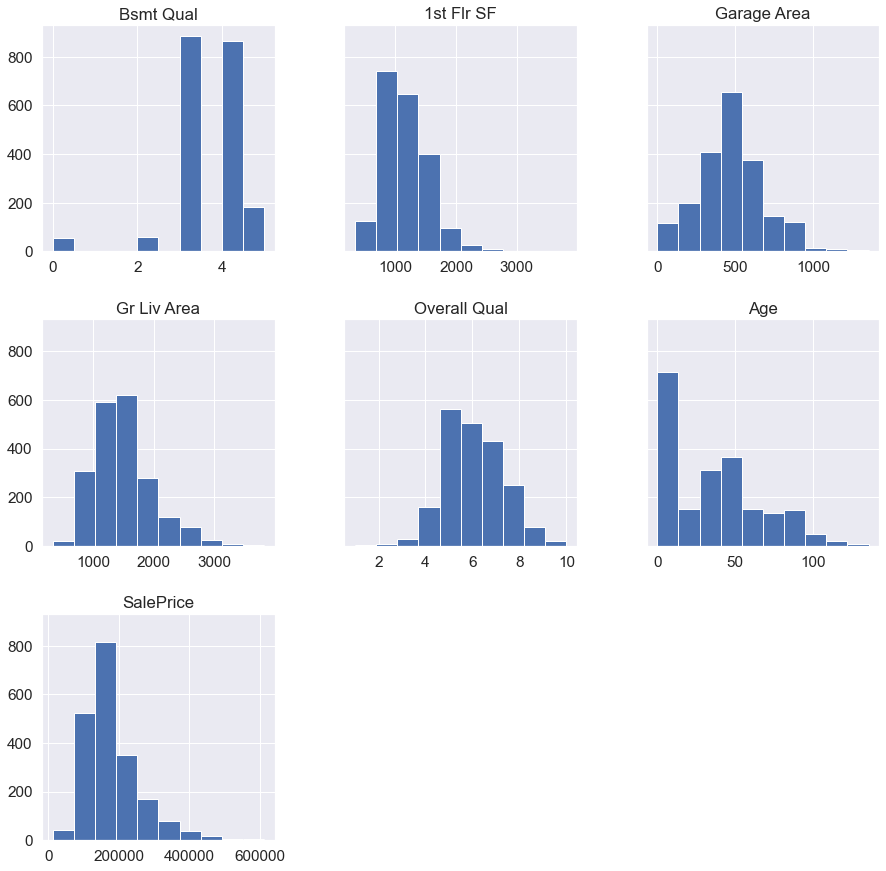

In [50]:
# Creating histograms of all numerical values

sns.set(font_scale=1.4)

house_train_clean.hist(figsize=(15,15), sharey=True)

Apart from Bsmt Qual that is an ordinal feature, all other features have a relatively standard deviation despite a smlight skew to the right.

### Neighborhood

Neighborhood is a complex variable as it have a high number of values. However we will try to simplify it by looking at the overall quality of houses by Neighborhood.

<AxesSubplot:title={'center':'Average Qual per Neighborhood'}, xlabel='Neighborhood', ylabel='Quality'>

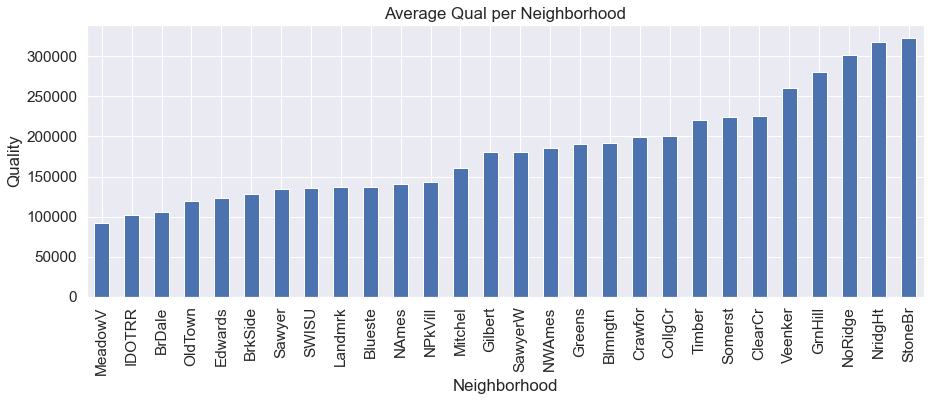

In [51]:
# Creating a plot based on the median saleprice per neighborhood.

house_train_clean.groupby('Neighborhood').median()['SalePrice'].sort_values().plot(
    kind='bar', figsize=(15,5), title=('Average Qual per Neighborhood'),
ylabel='Quality')

Based on the graph, we can see that once sorted, the neighborhoods seems to follow a pretty linear trend.
We can assume that Neighborhood with a higher Median SalePrice would be a better choice for us. 

We will transform the Neighorhood variable into an ordinal (ranked) type using the Median Sale Price as reference for the ranking (higher SalePrice, higher rank).

In [52]:
# Transfoming the Neighborhood varialbe into ordinal

nghrhd_rank = {'MeadowV': 1, 'IDOTRR': 2, 'BrDale': 3, 'OldTown': 4, 'Edwards': 5,
              'BrkSide': 6, 'Sawyer': 7, 'SWISU': 8, 'Landmrk': 9, 'Blueste': 10,
              'NAmes': 11, 'NPkVill': 12, 'Mitchel': 13, 'Gilbert': 14, 'SawyerW': 15,
              'NWAmes': 16, 'Greens': 17, 'Blmngtn': 18, 'Crawfor': 19, 'CollgCr': 20,
              'Timber': 21, 'Somerst': 22, 'ClearCr': 23, 'Veenker': 24, 'GrnHill': 25,
              'NoRidge': 26, 'NridgHt': 27, 'StoneBr': 28}

house_train_clean.replace({'Neighborhood': nghrhd_rank}, inplace=True)

### Saving New Dataframe to a CSV

Now that we finalized the selection and transformation of our features, we will be saving the cleaned up dataframe into a CSV file which we will be using for our modeling.

In [53]:
# Saving our new house_train_clean DF to a csv file to use for Modelling

house_train_clean.to_csv('datasets/train_cleaned.csv', index=False)

### Transforming Test DataSet based on our EDA

We now need to reproduce the data cleaning and feature engineering/transformation on our test dataset 

In [54]:
# Loading Test Dataset

house_test = pd.read_csv('datasets/test.csv')

##### Feature Engineering

In [55]:
# Creating a new column age for each houses

house_test['Age'] = house_test['Yr Sold'] - house_test['Year Built']

##### Transforming Ordinal and Categorical variables into numerical

In [56]:
# Converting Bsmt Qual to numerical values

house_test.replace({'Bsmt Qual': qualcond_rank}, inplace=True)

In [57]:
# Transforming the Neighborhood variable to ordinal

house_test.replace({'Neighborhood': nghrhd_rank}, inplace=True)

##### Creating a new DataFrame containing our selected Numerical and Categorical variables

In [58]:
# Creating a new clean Dataframe with only the columns we will use to train our model.

house_test_clean = house_test[['Bsmt Qual', '1st Flr SF', 'Garage Area', 'Gr Liv Area',
                               'Overall Qual', 'Neighborhood', 'House Style', 'Exterior 1st', 
                               'Mas Vnr Type', 'Foundation', 'Garage Type','Age']]

##### Saving New Dataframe to a CSV

In [59]:
# Saving our new house_test_clean DF to a csv file to use for Prediction

house_test_clean.to_csv('datasets/test_cleaned.csv', index=False)

##### Comparison between Train and Test

In [60]:
# Comparing Columns for our cleaned Train and test datasets

print(house_train_clean.columns)
print(house_test_clean.columns)

Index(['Bsmt Qual', '1st Flr SF', 'Garage Area', 'Gr Liv Area', 'Overall Qual',
       'Neighborhood', 'House Style', 'Exterior 1st', 'Mas Vnr Type',
       'Foundation', 'Garage Type', 'Age', 'SalePrice'],
      dtype='object')
Index(['Bsmt Qual', '1st Flr SF', 'Garage Area', 'Gr Liv Area', 'Overall Qual',
       'Neighborhood', 'House Style', 'Exterior 1st', 'Mas Vnr Type',
       'Foundation', 'Garage Type', 'Age'],
      dtype='object')


The columns between our Train and Test dataset are the same and in the same order, success!

In [61]:
house_train_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2049 entries, 0 to 2050
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Bsmt Qual     2049 non-null   int64  
 1   1st Flr SF    2049 non-null   int64  
 2   Garage Area   2049 non-null   float64
 3   Gr Liv Area   2049 non-null   int64  
 4   Overall Qual  2049 non-null   int64  
 5   Neighborhood  2049 non-null   int64  
 6   House Style   2049 non-null   object 
 7   Exterior 1st  2049 non-null   object 
 8   Mas Vnr Type  2049 non-null   object 
 9   Foundation    2049 non-null   object 
 10  Garage Type   2049 non-null   object 
 11  Age           2049 non-null   int64  
 12  SalePrice     2049 non-null   int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 224.1+ KB


In [62]:
house_test_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878 entries, 0 to 877
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Bsmt Qual     878 non-null    int64 
 1   1st Flr SF    878 non-null    int64 
 2   Garage Area   878 non-null    int64 
 3   Gr Liv Area   878 non-null    int64 
 4   Overall Qual  878 non-null    int64 
 5   Neighborhood  878 non-null    int64 
 6   House Style   878 non-null    object
 7   Exterior 1st  878 non-null    object
 8   Mas Vnr Type  877 non-null    object
 9   Foundation    878 non-null    object
 10  Garage Type   834 non-null    object
 11  Age           878 non-null    int64 
dtypes: int64(7), object(5)
memory usage: 82.4+ KB


Now that we have transformed our Test Dataset to match our Train Dataset.
* Columns are identical and in the same order
* Data Types are correct

We can move on to the modeling part of our project.